In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Read in intermediate datasets from 03_Exploratory_Data_Analysis

In [3]:
# Consolidated hit and non-hit songs 
data = pd.read_csv('../data/final/modeling_dataset_32k.csv')

In [4]:
# Drop non-numeric columns
data_numeric = data.drop(['song', 'artist', 'song_artist'], axis=1)

# 7. Modeling

In [5]:
# Split data into features (X) and labels (y)
X = data_numeric.drop('hit_song', axis=1)
y = data_numeric['hit_song']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression model 

### 1) Logistic Regression model initiation and training using all features in dataset

In [8]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

### 2) Make prediction using the Logistic Regression model trained with all features

In [9]:
y_pred_lr = model_lr.predict(X_test_scaled)

In [10]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7274126519932277

In [11]:
class_report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
pd.DataFrame(class_report_lr).transpose()

,precision,recall,f1-score,support
0,0.799507,0.602663,0.687268,3229.000000
1,0.684223,0.850673,0.758423,3268.000000
accuracy,0.727413,0.727413,0.727413,0.727413
macro avg,0.741865,0.726668,0.722846,6497.000000
weighted avg,0.741519,0.727413,0.723059,6497.000000


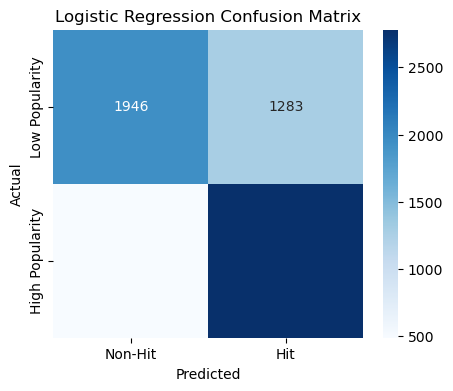

In [12]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

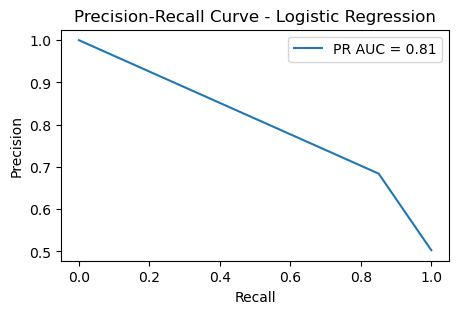

In [13]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.show()


### 3) Extract the coefficients of the features
#### *Identify the features with the most significant relationship with the likelihood of a song being a hit or non-hit.*

In [14]:
# Extracting the coefficients
coefficients = model_lr.coef_[0]
features = X.columns

In [15]:
# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the coefficients for better visualization
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_abs = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_abs

,Feature,Coefficient,Absolute_Coefficient
7,instrumentalness,-1.191185,1.191185
3,loudness,0.794711,0.794711
1,energy,-0.541084,0.541084
6,acousticness,-0.449552,0.449552
0,danceability,0.376121,0.376121
13,year,-0.211335,0.211335
5,speechiness,-0.195780,0.195780
9,valence,0.137653,0.137653
4,mode,0.102678,0.102678
12,time_signature,0.088233,0.088233


### 4) Train another Logistic Regression model with the top 5 features and make prediction

In [16]:
features_to_use = ['instrumentalness', 'loudness', 'energy', 'acousticness', 'danceability']
X_5f = data_numeric[features_to_use]
y_5f = data_numeric['hit_song']
X_train_5f, X_test_5f, y_train_5f, y_test_5f = train_test_split(X_5f, y_5f, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

In [18]:
model_lr_5f = LogisticRegression()
model_lr_5f.fit(X_train_5f, y_train_5f)

LogisticRegression()

In [19]:
y_pred_5f = model_lr_5f.predict(X_test_5f)

In [20]:
# Evaluate the model
accuracy_lr_5f = accuracy_score(y_test_5f, y_pred_5f)
accuracy_lr_5f

0.7160227797444975

In [21]:
class_report_lr_5f = classification_report(y_test_5f, y_pred_5f, output_dict=True)
pd.DataFrame(class_report_lr_5f).transpose()

,precision,recall,f1-score,support
0,0.791001,0.582533,0.670947,3229.000000
1,0.672736,0.847919,0.750237,3268.000000
accuracy,0.716023,0.716023,0.716023,0.716023
macro avg,0.731868,0.715226,0.710592,6497.000000
weighted avg,0.731514,0.716023,0.710830,6497.000000


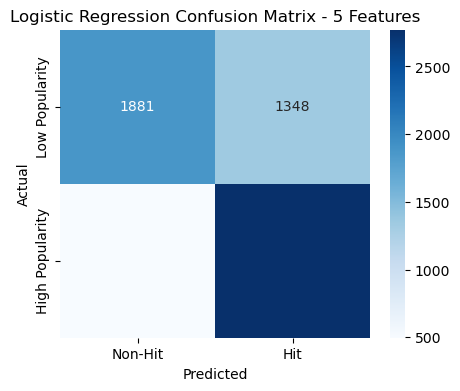

In [22]:
conf_matrix_lr_5f = confusion_matrix(y_test_5f, y_pred_5f)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr_5f, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Logistic Regression Confusion Matrix - 5 Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Classifier model 

### 1) Random Forest Classifier model initiation and training

In [23]:
# Initialize and train the RandomForestClassifier with all features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Make prediction
y_pred_rf = rf_model.predict(X_test_scaled)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.7715868862551947

In [26]:
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf).transpose()

,precision,recall,f1-score,support
0,0.822313,0.689378,0.750000,3229.000000
1,0.735356,0.852815,0.789742,3268.000000
accuracy,0.771587,0.771587,0.771587,0.771587
macro avg,0.778834,0.771096,0.769871,6497.000000
weighted avg,0.778573,0.771587,0.769990,6497.000000


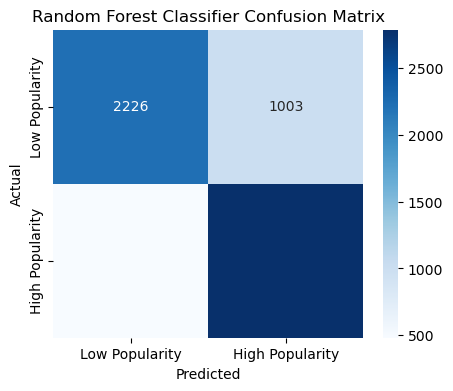

In [27]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2) Plot a single decision tree from the Random Forest, with the first three levels of dept

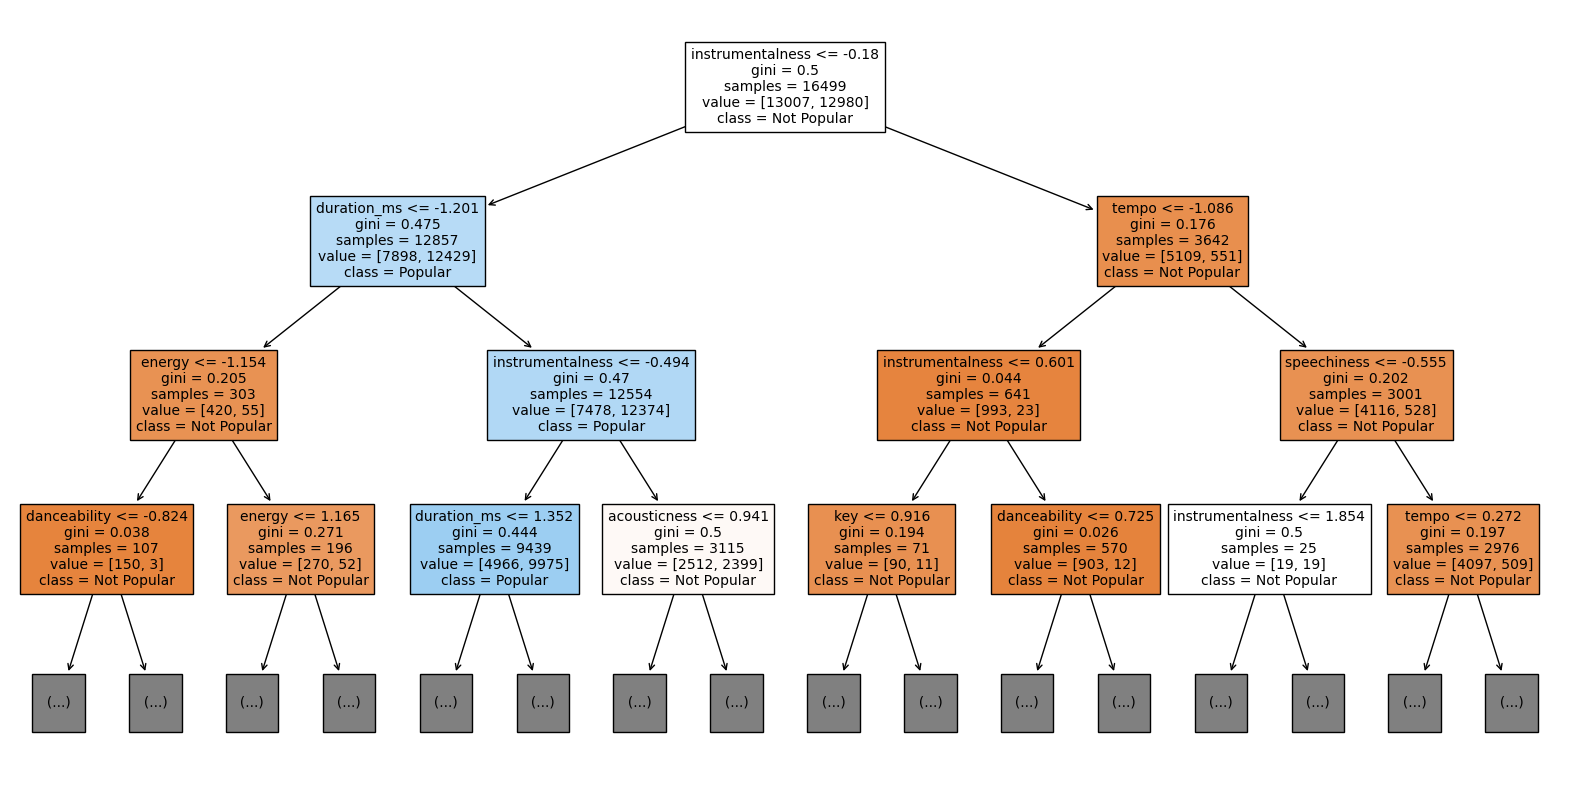

In [29]:
from sklearn.tree import plot_tree

# Select one tree from the random forest
single_tree = rf_model.estimators_[0]
feature_names_list = X_train.columns.tolist()

# Set the figure size for the plot
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(single_tree, 
          filled=True, 
          feature_names=feature_names_list, 
          class_names=['Not Popular', 'Popular'], 
          max_depth=3,  # Set the maximum depth to avoid a very large tree
          fontsize=10)

# Show the plot
plt.show()

### 3) Feature importance in this RandomForestClassifier model

In [30]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
7   instrumentalness    0.173489
6       acousticness    0.109536
1             energy    0.093730
3           loudness    0.090953
11       duration_ms    0.084662
0       danceability    0.083874
9            valence    0.071461
5        speechiness    0.067860
8           liveness    0.059163
10             tempo    0.058980
13              year    0.058103
2                key    0.032686
4               mode    0.008586
12    time_signature    0.006918


### 4) Hyperparameter Tuning the Random Forest Classifier
#### *Use Randomized Search with Cross-Validation to identify the best hyperparameter values for the Random Forest classifier.*

In [31]:
# Fine-tune the Random Forest model using Randomized Search to improve its accuracy
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid to sample from during fitting
param_distributions = {'n_estimators': np.arange(100, 1001, 100), 
    'max_depth': [None] + list(np.arange(5, 51, 5)),  
    'min_samples_split': np.arange(2, 11, 1),  
    'min_samples_leaf': np.arange(1, 11, 1),  
    'bootstrap': [True, False]}  

In [32]:
# Initialize another RandomForestClassifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model_tuned, param_distributions=param_distributions, n_iter=8,
    cv=3, verbose=2, random_state=42, n_jobs=-1)

In [33]:
# Start Timing
import time
start_time = time.time()

In [34]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, verbose=2)

In [35]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting: {elapsed_time} seconds")

Elapsed time for RandomizedSearchCV fitting: 124.34211111068726 seconds


In [36]:
# Get the best parameters from the randomized search
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 30, 'bootstrap': False}
Best score: 0.7708469479374694


In [37]:
# Use the best model from randomized search
best_rf_model = random_search.best_estimator_
best_y_pred_rf = best_rf_model.predict(X_test_scaled)

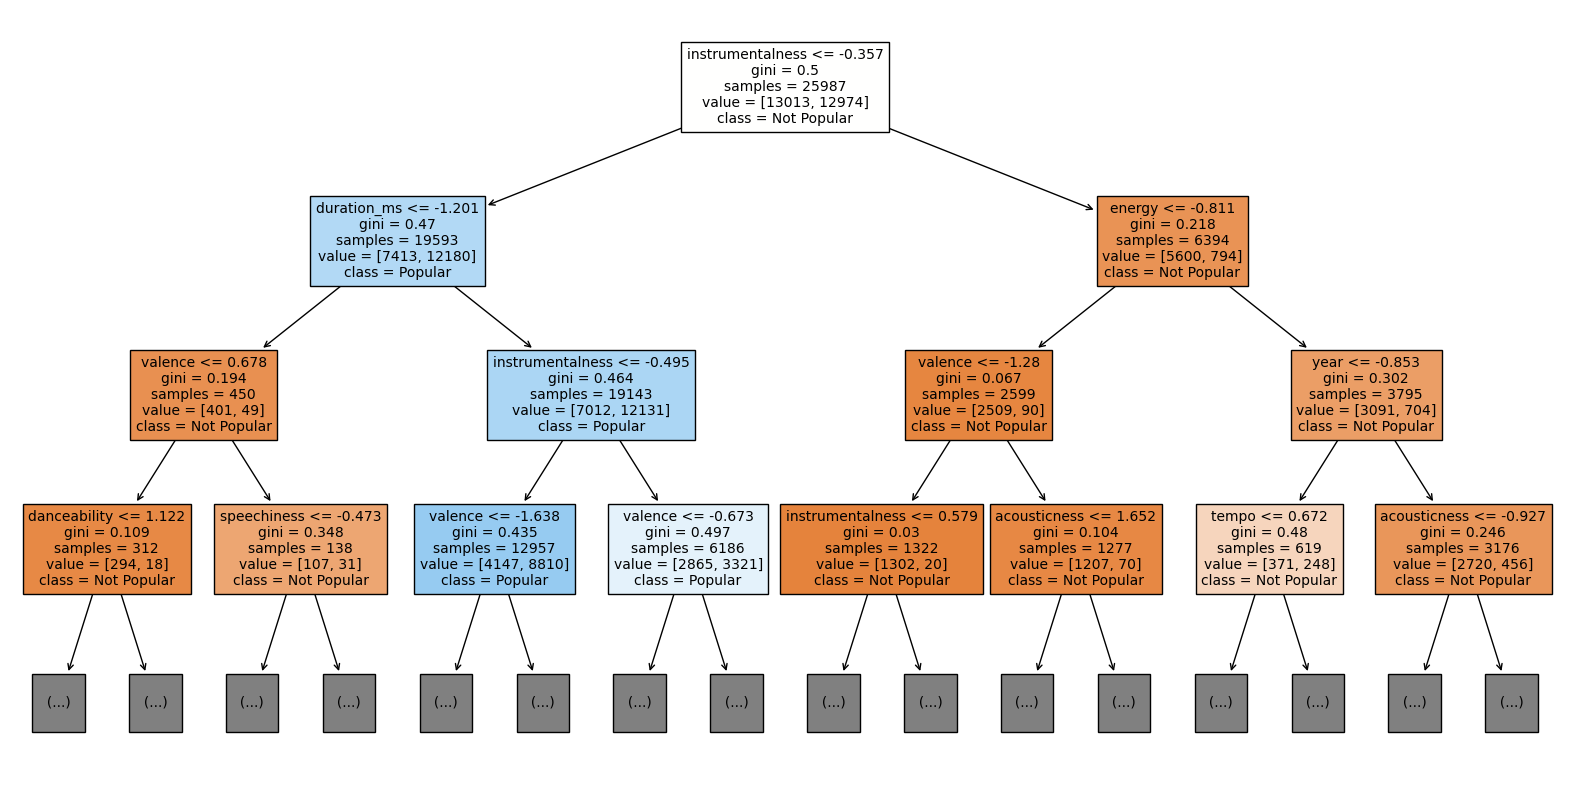

In [39]:
# Plot a single decision tree
from sklearn.tree import plot_tree

# Select one tree from the random forest
single_tree = best_rf_model.estimators_[0]
feature_names_list = X_train.columns.tolist()

# Set the figure size for the plot
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(single_tree, 
          filled=True, 
          feature_names=feature_names_list, 
          class_names=['Not Popular', 'Popular'], 
          max_depth=3,  # Set the maximum depth to avoid a very large tree
          fontsize=10)

# Show the plot
plt.show()

In [40]:
# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, best_y_pred_rf)
accuracy_rf_best

0.7725103894104971

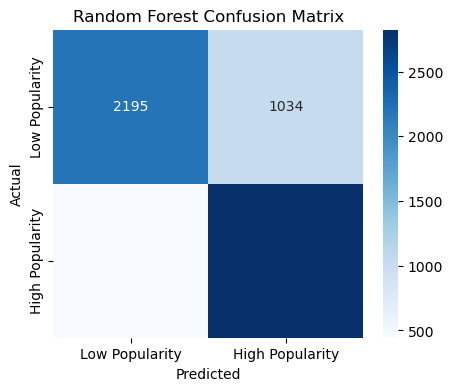

In [41]:
conf_matrix_kn = confusion_matrix(y_test, best_y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
class_report_rf_best = classification_report(y_test, best_y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf_best).transpose()

,precision,recall,f1-score,support
0,0.831754,0.679777,0.748125,3229.00000
1,0.731985,0.864137,0.792591,3268.00000
accuracy,0.772510,0.772510,0.772510,0.77251
macro avg,0.781870,0.771957,0.770358,6497.00000
weighted avg,0.781571,0.772510,0.770491,6497.00000


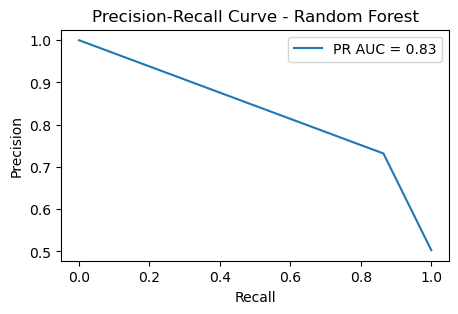

In [43]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_y_pred_rf)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()

## K-Nearest Neighbors Classifier model

### 1) K-Nearest Neighbors Classifier model initiation and training

In [44]:
# Initialize and train the KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [45]:
y_pred_kn = knn_model.predict(X_test_scaled)

In [46]:
# Evaluate the model
accuracy_kn = accuracy_score(y_test, y_pred_kn)
accuracy_kn

0.725257811297522

In [47]:
class_report_kn = classification_report(y_test, y_pred_kn, output_dict=True)
pd.DataFrame(class_report_kn).transpose()

,precision,recall,f1-score,support
0,0.778335,0.625271,0.693457,3229.000000
1,0.689982,0.824051,0.751081,3268.000000
accuracy,0.725258,0.725258,0.725258,0.725258
macro avg,0.734158,0.724661,0.722269,6497.000000
weighted avg,0.733893,0.725258,0.722442,6497.000000


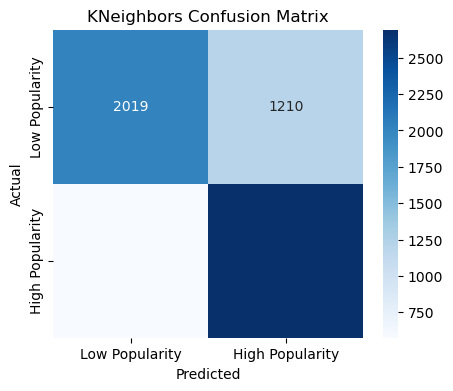

In [48]:
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('KNeighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

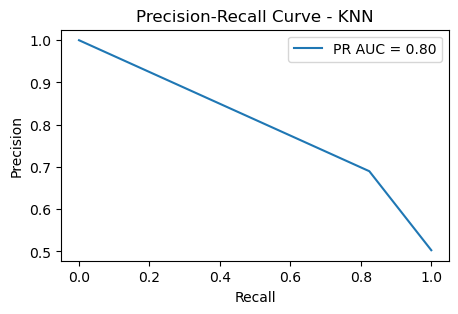

In [49]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_kn)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend()
plt.show()

### 2) K-Nearest Neighbors 3D Clustering

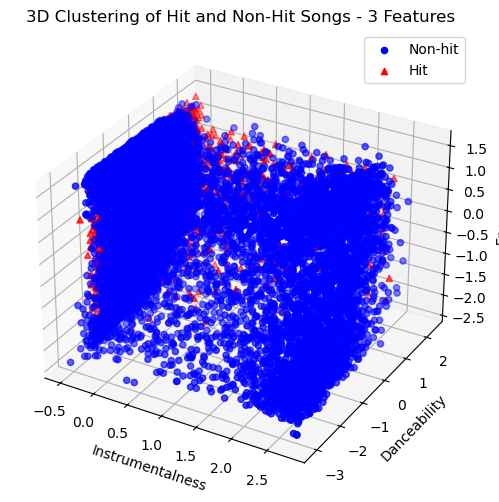

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Selecting features
instrumentalness, danceability, energy = X_train_scaled[:, 7], X_train_scaled[:, 0], X_train_scaled[:, 1]

fig = plt.figure(figsize=(12, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-hit and hit songs
ax.scatter(instrumentalness[y_train == 0], danceability[y_train == 0], energy[y_train == 0],
           c='blue', marker='o', label='Non-hit') 
ax.scatter(instrumentalness[y_train == 1], danceability[y_train == 1], energy[y_train == 1],
           c='red', marker='^', label='Hit')  

ax.set_xlabel('Instrumentalness')
ax.set_ylabel('Danceability')
ax.set_zlabel('Energy')
ax.set_title('3D Clustering of Hit and Non-Hit Songs - 3 Features')  
ax.legend()

## XGBoost Classifier model

### 1) XGBoost Classifier model initiation and training

In [72]:
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder = False)
xgb_clf.fit(X_train_scaled, y_train)

C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [73]:
# Prediction
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [74]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.7717408034477451

In [75]:
class_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
pd.DataFrame(class_report_xgb).transpose()

,precision,recall,f1-score,support
0,0.816993,0.696810,0.752131,3229.000000
1,0.738445,0.845777,0.788475,3268.000000
accuracy,0.771741,0.771741,0.771741,0.771741
macro avg,0.777719,0.771294,0.770303,6497.000000
weighted avg,0.777484,0.771741,0.770412,6497.000000


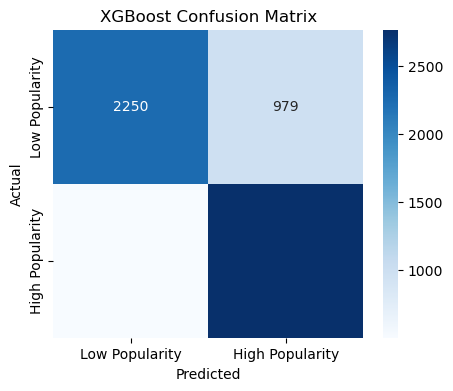

In [76]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

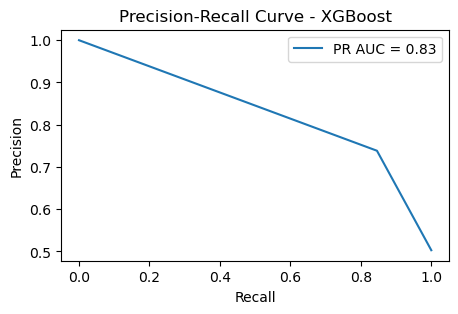

In [56]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.show()

### 2) Hyperparameter Tuning the XGBoost Classifier

In [57]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]}

In [58]:
# Initialize the XGBoost classifier
xgb_clf_tuned = xgb.XGBClassifier(eval_metric='logloss')

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=8, cv=3, verbose=1, n_jobs=-1, random_state=42)

In [60]:
import time

# Start timing
start_time = time.time()

In [61]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([3, 5, 7, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [62]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting with XGBoost: {elapsed_time} seconds")

Elapsed time for RandomizedSearchCV fitting with XGBoost: 13.390958309173584 seconds


In [63]:
# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'subsample': 0.6, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score: 0.7755031014622379


In [64]:
# Predict using the best estimator
best_xgb_clf = random_search.best_estimator_
y_pred_xgb_best = best_xgb_clf.predict(X_test_scaled)

In [65]:
# Evaluate the model
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
accuracy_xgb_best

0.7828228413113745

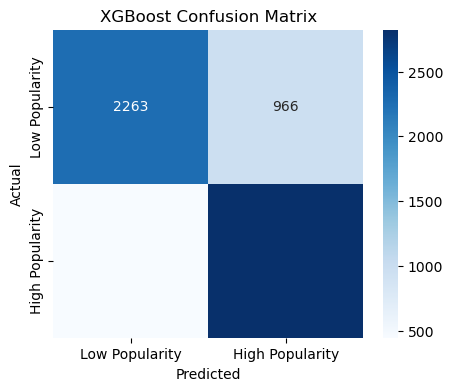

In [66]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_best)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
class_report_xgb_best = classification_report(y_test, y_pred_xgb_best, output_dict=True)
pd.DataFrame(class_report_xgb_best).transpose()

,precision,recall,f1-score,support
0,0.835672,0.700836,0.762338,3229.000000
1,0.745051,0.863831,0.800057,3268.000000
accuracy,0.782823,0.782823,0.782823,0.782823
macro avg,0.790362,0.782334,0.781197,6497.000000
weighted avg,0.790090,0.782823,0.781310,6497.000000


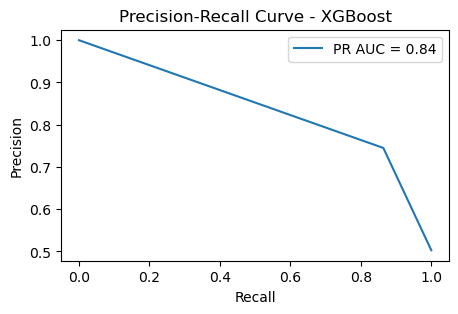

In [68]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_best)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.show()

### 3) Plot the learning curve of the XGBoost model that has been optimized

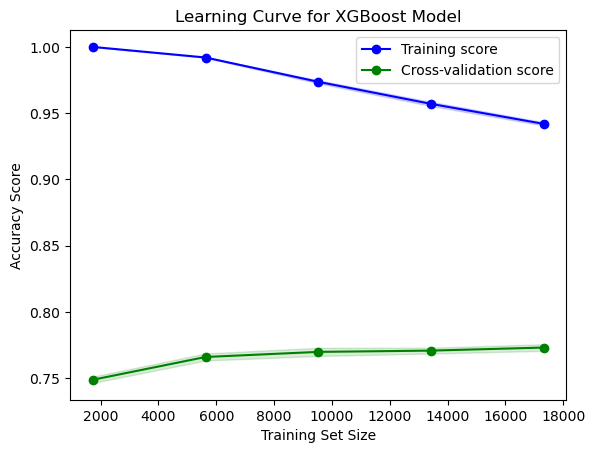

In [69]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 5)

# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb_clf, X_train_scaled, y_train,
    train_sizes=train_sizes, cv=3, scoring='accuracy')

# Calculate the average and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.15)

plt.title('Learning Curve for XGBoost Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()

plt.show()

#### *The training score and the cross-validation score have a trend to converge if more training data is available, which indicates the model may generalize better with larger datasets.*

### 3) Check the feature importance of the hyperparameter tuned XGBoost Classifier

In [70]:
# Check feature importance
importances = best_xgb_clf.feature_importances_

In [71]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

             Feature  Importance
7   instrumentalness    0.231306
6       acousticness    0.088865
3           loudness    0.069644
11       duration_ms    0.067895
1             energy    0.063161
13              year    0.062340
0       danceability    0.061486
12    time_signature    0.060489
5        speechiness    0.055767
4               mode    0.055053
9            valence    0.052940
8           liveness    0.046444
10             tempo    0.044747
2                key    0.039863
